# THIS IS NOT A TUTORIAL

This notebook is my (Abhinav Uppala) exploration & development of unsupervised learning techniques to be used with this dataset. Tutorials for how to use my implemented methods & everything else are in the other notebook files.

In [81]:
from TelescopeML.DataMaster import *
from TelescopeML.DeepTrainer import *
from TelescopeML.Predictor import *
from TelescopeML.IO_utils import load_or_dump_trained_model_CNN
from TelescopeML.StatVisAnalyzer import *

Loading BokehJS ...

Loading BokehJS ...

Loading BokehJS ...

# Unsupervised Learning Exploration

This first part is just repeated from the previous tutorials, in order to load the training data to be used in unsupervised learning.

In [82]:
import os 

__reference_data_path__ = os.getenv("TelescopeML_reference_data")
__reference_data_path__ 


# Note: insert the directory of the reference_data if you get an error reading the reference data!!!
# __reference_data_path__ = 'INSERT_DIRECTORY_OF_reference_data'


'C:\\Users\\abhin\\TelescopeML_project\\reference_data'

In [83]:
train_BD = pd.read_csv(os.path.join(__reference_data_path__, 
                                    'training_datasets', 
                                    'browndwarf_R100_v4_newWL_v3.csv.bz2'), compression='bz2')
train_BD.head()

gravity  temperature  c_o_ratio  metallicity         2.512         2.487  \
0      5.0         1100       0.25         -1.0  9.103045e-08  1.181658e-07   
1      5.0         1100       0.25         -0.7  9.103045e-08  1.181658e-07   
2      5.0         1100       0.25         -0.5  9.103045e-08  1.181658e-07   
3      5.0         1100       0.25         -0.3  9.103045e-08  1.181658e-07   
4      5.0         1100       0.25          0.0  9.103045e-08  1.181658e-07   

          2.462         2.438         2.413         2.389  ...         0.981  \
0  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08  ...  1.257751e-07   
1  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08  ...  1.257751e-07   
2  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08  ...  1.257751e-07   
3  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08  ...  1.257751e-07   
4  1.307868e-07  1.269229e-07  1.159179e-07  8.925110e-08  ...  1.257751e-07   

          0.971         0.962         0.952         0.943         0.933  \
0  9.640859e-08  7.612550e-08  6.901364e-08  6.247359e-08  4.112384e-08   
1  9.640859e-08  7.612550e-08  6.901364e-08  6.247359e-08  4.112384e-08   
2  9.640859e-08  7.612550e-08  6.901364e-08  6.247359e-08  4.112384e-08   
3  9.640859e-08  7.612550e-08  6.901364e-08  6.247359e-08  4.112384e-08   
4  9.640859e-08  7.612550e-08  6.901364e-08  6.247359e-08  4.112384e-08   

          0.924         0.915         0.906         0.897  
0  5.127995e-08  4.897355e-08  4.087795e-08  2.791689e-08  
1  5.127995e-08  4.897355e-08  4.087795e-08  2.791689e-08  
2  5.127995e-08  4.897355e-08  4.087795e-08  2.791689e-08  
3  5.127995e-08  4.897355e-08  4.087795e-08  2.791689e-08  
4  5.127995e-08  4.897355e-08  4.087795e-08  2.791689e-08  

[5 rows x 108 columns]

In [84]:
output_names = ['gravity', 'temperature', 'c_o_ratio', 'metallicity']
train_BD[output_names].head()

gravity  temperature  c_o_ratio  metallicity
0      5.0         1100       0.25         -1.0
1      5.0         1100       0.25         -0.7
2      5.0         1100       0.25         -0.5
3      5.0         1100       0.25         -0.3
4      5.0         1100       0.25          0.0

In [85]:
wavelength_names = [item for item in train_BD.columns.to_list() if item not in output_names]
wavelength_names[:5]

['2.512', '2.487', '2.462', '2.438', '2.413']

In [86]:
wavelength_values = [float(item) for item in wavelength_names]
wavelength_values[:10]

[2.512, 2.487, 2.462, 2.438, 2.413, 2.389, 2.366, 2.342, 2.319, 2.296]

In [87]:
wl_synthetic = pd.read_csv(os.path.join(__reference_data_path__, 
                                        'training_datasets', 
                                        'wl.csv'))
wl_synthetic.head()

wl
0  2.511960
1  2.486966
2  2.462220
3  2.437720
4  2.413464

## Prepare Inputs & Outputs

In [88]:
# Training  variables
X = train_BD.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity'])


# Target/Output feature variables
y = train_BD[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]

In [89]:
y.loc[:, 'temperature'] = np.log10(y['temperature'])

In [90]:
# check the output variables
y.head()

gravity  c_o_ratio  metallicity  temperature
0      5.0       0.25         -1.0     3.041393
1      5.0       0.25         -0.7     3.041393
2      5.0       0.25         -0.5     3.041393
3      5.0       0.25         -0.3     3.041393
4      5.0       0.25          0.0     3.041393

In [91]:
# check our input variables table
X.head()

2.512         2.487         2.462         2.438         2.413  \
0  9.103045e-08  1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07   
1  9.103045e-08  1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07   
2  9.103045e-08  1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07   
3  9.103045e-08  1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07   
4  9.103045e-08  1.181658e-07  1.307868e-07  1.269229e-07  1.159179e-07   

          2.389         2.366         2.342         2.319         2.296  ...  \
0  8.925110e-08  8.548790e-08  6.015843e-08  9.539690e-08  7.383212e-08  ...   
1  8.925110e-08  8.548790e-08  6.015843e-08  9.539690e-08  7.383212e-08  ...   
2  8.925110e-08  8.548790e-08  6.015843e-08  9.539690e-08  7.383212e-08  ...   
3  8.925110e-08  8.548790e-08  6.015843e-08  9.539690e-08  7.383212e-08  ...   
4  8.925110e-08  8.548790e-08  6.015843e-08  9.539690e-08  7.383212e-08  ...   

          0.981         0.971         0.962         0.952         0.943  \
0  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08  6.247359e-08   
1  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08  6.247359e-08   
2  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08  6.247359e-08   
3  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08  6.247359e-08   
4  1.257751e-07  9.640859e-08  7.612550e-08  6.901364e-08  6.247359e-08   

          0.933         0.924         0.915         0.906         0.897  
0  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08  2.791689e-08  
1  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08  2.791689e-08  
2  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08  2.791689e-08  
3  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08  2.791689e-08  
4  4.112384e-08  5.127995e-08  4.897355e-08  4.087795e-08  2.791689e-08  

[5 rows x 104 columns]

In [92]:
# 104 rows, 30_888 columns
X.shape

(30888, 104)

## PCA

I decided to try Principal Component Analysis first because it's reliable & quick for a first test run. Once I do a first attempt, I can try other methods that may be more time or resource intensive. I chose this approach due to the short deadline (1 week) and computational capabilities (laptop).

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing

In [94]:
X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

array([[-0.31312607, -0.31507733, -0.31761373, -0.32395085, -0.3369144 ,
        -0.35760755, -0.36587906, -0.37099414, -0.36639896, -0.38134039,
        -0.38611028, -0.38779643, -0.37112821, -0.37903271, -0.33094519,
        -0.30793144, -0.28823629, -0.27208209, -0.25980226, -0.26989023,
        -0.27006092, -0.28042034, -0.30365634, -0.31023658, -0.32940748,
        -0.34148938, -0.3361941 , -0.3310189 , -0.31526892, -0.32219609,
        -0.31931609, -0.32911101, -0.33015185, -0.32401318, -0.32274677,
        -0.33217374, -0.32416863, -0.32024413, -0.31086675, -0.33257572,
        -0.32810172, -0.32892751, -0.29389404, -0.30032338, -0.27334418,
        -0.21492982, -0.20578419, -0.23740824, -0.26138444, -0.28465813,
        -0.30499141, -0.31681964, -0.32394721, -0.32138745, -0.31698844,
        -0.32175107, -0.31790998, -0.30612685, -0.32603988, -0.33097194,
        -0.33400312, -0.32920479, -0.34421791, -0.35127925, -0.29316499,
        -0.22697875, -0.20027294, -0.16371611, -0.1

In [95]:
# Dimensionality reduction on X values
pca = PCA()
pca.fit(X_scaled)
pca_data = pca.transform(X_scaled)

In [96]:
# Calculate variances that each PC accounts for
variances = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = [f'PC{i + 1}' for i in range(len(variances))]

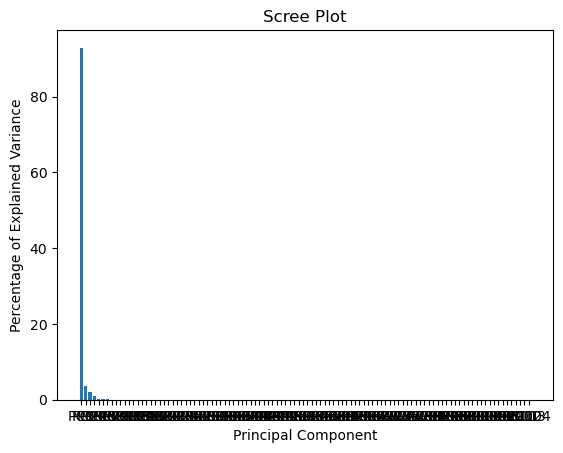

In [97]:
# Plot the percent variances of each PC
plt.bar(x=range(1,len(variances)+1), height=variances, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show()

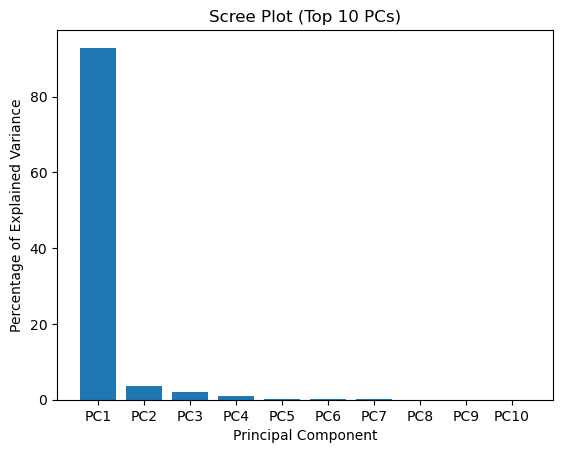

In [98]:
# Since there are a lot of principal components let's look at the top 10
# as the rest don't seem to have any effect at all
plt.bar(x=range(1,11), height=variances[:10], tick_label=labels[:10])
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot (Top 10 PCs)')
plt.show()

In [99]:
variances[0] + variances[1]

96.60000000000001

In [100]:
labels[:5]

['PC1', 'PC2', 'PC3', 'PC4', 'PC5']

Since the first 2 Principal Components account for 96.6% of the variation it should be fine to use these 2 in a 2D plot to eyeball clusters

In [101]:
pca_data.shape

(30888, 104)

Text(0, 0.5, 'PC2 - 3.7%')

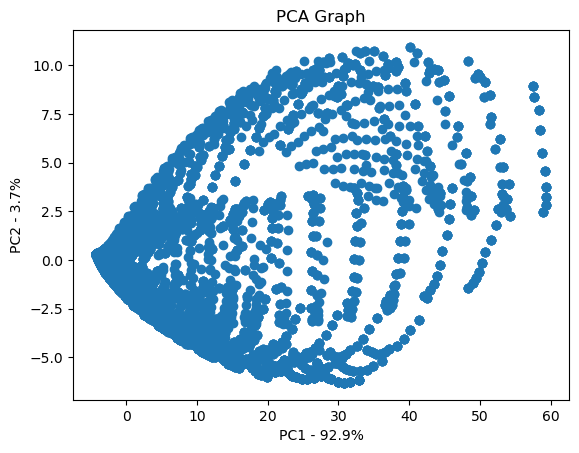

In [102]:
# Unannotated graph to start with
# From here, draw seperate graphs
pca_df = pd.DataFrame(pca_data, index=list(range(30888)), columns=labels)

plt.scatter(pca_df.PC1, pca_df.PC2)
plt.title('PCA Graph')
plt.xlabel(f'PC1 - {variances[0]}%')
plt.ylabel(f'PC2 - {variances[1]}%')

In [103]:
pca_df.head()

PC1       PC2       PC3       PC4      PC5       PC6       PC7  \
0 -3.057954  0.039267 -0.349515 -0.224111  0.05906 -0.208964 -0.173231   
1 -3.057954  0.039267 -0.349515 -0.224111  0.05906 -0.208964 -0.173231   
2 -3.057954  0.039267 -0.349515 -0.224111  0.05906 -0.208964 -0.173231   
3 -3.057954  0.039267 -0.349515 -0.224111  0.05906 -0.208964 -0.173231   
4 -3.057954  0.039267 -0.349515 -0.224111  0.05906 -0.208964 -0.173231   

        PC8       PC9      PC10  ...      PC95      PC96      PC97      PC98  \
0 -0.092268 -0.193533  0.032331  ... -0.000929  0.000293 -0.000241 -0.000081   
1 -0.092268 -0.193533  0.032331  ... -0.000929  0.000293 -0.000241 -0.000081   
2 -0.092268 -0.193533  0.032331  ... -0.000929  0.000293 -0.000241 -0.000081   
3 -0.092268 -0.193533  0.032331  ... -0.000929  0.000293 -0.000241 -0.000081   
4 -0.092268 -0.193533  0.032331  ... -0.000929  0.000293 -0.000241 -0.000081   

       PC99     PC100     PC101     PC102     PC103     PC104  
0  0.000119  0.000465  0.000258  0.000294 -0.000029  0.000141  
1  0.000119  0.000465  0.000258  0.000294 -0.000029  0.000141  
2  0.000119  0.000465  0.000258  0.000294 -0.000029  0.000141  
3  0.000119  0.000465  0.000258  0.000294 -0.000029  0.000141  
4  0.000119  0.000465  0.000258  0.000294 -0.000029  0.000141  

[5 rows x 104 columns]

In [104]:
pca_df.shape

(30888, 104)

In [105]:
# Create a function that plots the PCA Graph but color codes with reference to a certain parameter
# for instance, with temperature, the lowest temperature is the darkest dot.

def plot_PCA_against_single_feature(feature: str):

    arr = y[feature].values
    normalized_values = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

    plt.scatter(pca_df.PC1, pca_df.PC2, s = 4, c=[(normalized_values[i], normalized_values[i], 0) for i in range(len(pca_df))])
    plt.title(f'PCA Graph - {feature}')
    plt.xlabel(f'PC1 - {variances[0]}%')
    plt.ylabel(f'PC2 - {variances[1]}%')

In [106]:
y.columns

Index(['gravity', 'c_o_ratio', 'metallicity', 'temperature'], dtype='object')

## Observations

Temperature - very concentrated at one point, while it's spread out. Clusters are not as intermingled as other ones but still a little vague, especially since so many of them are concentrated at one area. The best clustering method to use here might be DBSCAN or GMM.

C/O Ratio - arguably the cleanest clusters, being grouped horizontally into almost 4-5 groups. This one could utilize K-means better than others but DBSCAN still seems better still, since there are a lot of points concentrated at the bottom. Tiny bit of overlap, so GMM isn't really necessary here.

Metallicity - clusters are very much intermingling, almost like a rib cage of some sort, where clusters form a straight-ish line approaching from the top/bottom. Here I believe that GMM would be the best course of action, due to it's ability to deal with overlapping clusters. DBSCAN would be the next best bet I believe.

Gravity - similar to metallicity, but the bottom is not like one big cluster; instead, it also alternates between high and low gravity. Again, GMM seems like the best method.

Overall the clusters are quite misleading, so it is probably worth trying a different dimensionality reduction method. PCA does not seem to do well since it wants nonlinear data.

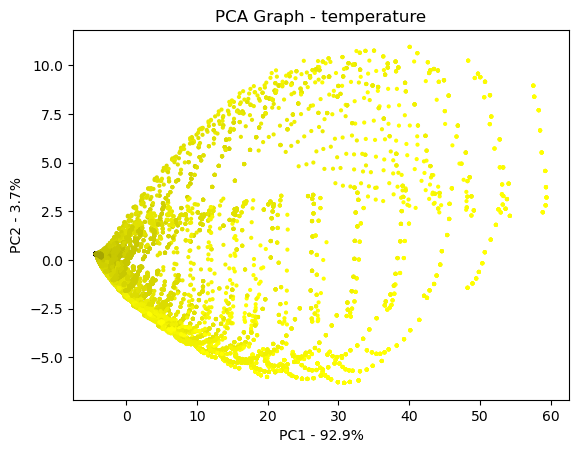

In [107]:
plot_PCA_against_single_feature('temperature')

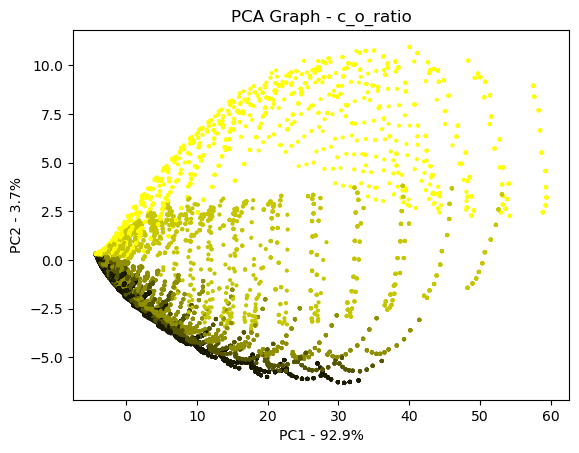

In [108]:
plot_PCA_against_single_feature('c_o_ratio')

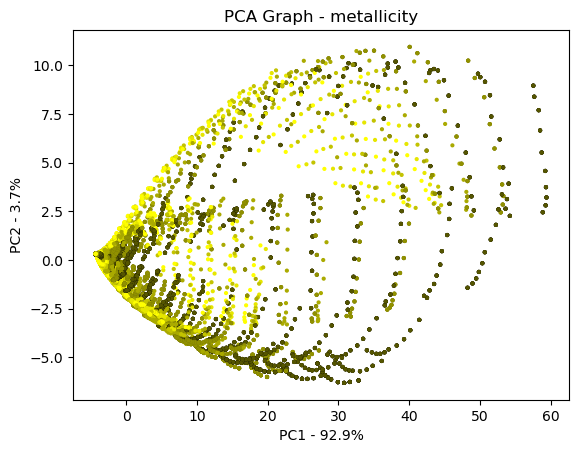

In [109]:
plot_PCA_against_single_feature('metallicity')

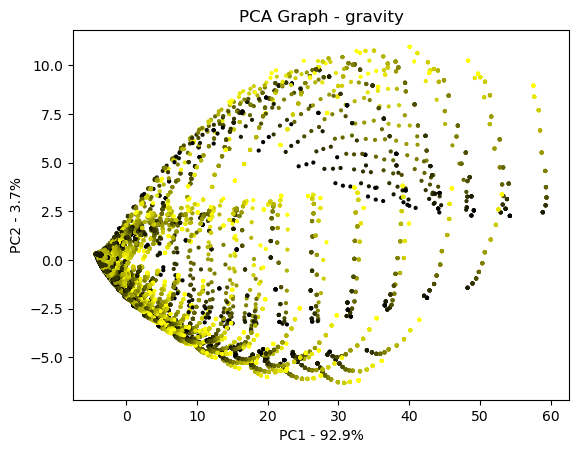

In [110]:
plot_PCA_against_single_feature('gravity')

## Autoencoder

Since PCA did not work out well, I want to try an autoencoder approach to see if it creates better clusters. I avoided this at first because of the training time, but it would be unfair to test a clustering method on this jumbled up plot and blame the failure on the clustering method.

In [111]:
from sklearn.model_selection import train_test_split

# 80/20 train/test split
train, test = train_test_split(train_BD, test_size=0.2)

display(train.head())
display(test.head())

gravity  temperature  c_o_ratio  metallicity         2.512  \
23410     3.50         2100       0.25          1.7  6.960825e-07   
22151     4.50         1800       1.50          2.0  3.552811e-07   
13303     5.25         1700       2.00          0.7  6.147024e-07   
17035     5.25          275       1.50          0.7  1.477680e-13   
29400     4.25          950       1.00         -1.0  3.865400e-08   

              2.487         2.462         2.438         2.413         2.389  \
23410  8.441733e-07  1.016480e-06  1.052485e-06  1.201031e-06  1.424476e-06   
22151  4.395661e-07  5.300196e-07  5.760761e-07  5.439170e-07  5.869190e-07   
13303  6.156911e-07  5.545822e-07  4.829514e-07  4.468211e-07  3.575566e-07   
17035  1.526516e-13  8.153482e-14  9.687630e-15  1.788158e-15  1.165481e-16   
29400  4.291881e-08  3.569766e-08  2.697272e-08  2.288154e-08  1.433312e-08   

       ...         0.981         0.971         0.962         0.952  \
23410  ...  3.316751e-07  3.331415e-07  3.043150e-07  3.243060e-07   
22151  ...  2.410099e-07  1.987916e-07  1.633624e-07  1.669569e-07   
13303  ...  8.845705e-07  8.625873e-07  7.785963e-07  6.642892e-07   
17035  ...  1.936306e-13  1.170441e-13  5.043207e-15  6.770305e-16   
29400  ...  5.904458e-08  4.515416e-08  3.435637e-08  3.306107e-08   

              0.943         0.933         0.924         0.915         0.906  \
23410  2.744239e-07  2.270990e-07  4.050839e-07  5.463692e-07  5.114262e-07   
22151  1.421048e-07  1.034428e-07  1.268837e-07  1.250650e-07  1.068786e-07   
13303  5.523682e-07  4.494389e-07  4.367155e-07  4.357094e-07  3.439643e-07   
17035  2.583841e-15  3.564929e-17  4.488980e-13  1.527083e-13  3.941314e-14   
29400  2.967499e-08  1.926441e-08  2.675747e-08  2.576855e-08  2.113025e-08   

              0.897  
23410  4.059780e-07  
22151  7.348502e-08  
13303  2.463367e-07  
17035  1.893365e-15  
29400  1.336843e-08  

[5 rows x 108 columns]

gravity  temperature  c_o_ratio  metallicity         2.512  \
20290     5.25          400       2.00          1.7  2.258949e-13   
13045     4.25          350       0.50         -0.7  2.854241e-11   
24217     5.00          300       1.00         -0.7  2.133617e-12   
29671     3.50          250       0.25          0.7  8.355343e-14   
27234     4.25          450       0.50          0.5  9.387658e-11   

              2.487         2.462         2.438         2.413         2.389  \
20290  1.910139e-13  1.167601e-13  1.481240e-14  2.792723e-15  1.585465e-16   
13045  3.377244e-11  2.977030e-11  1.120344e-11  5.367351e-12  2.105156e-12   
24217  2.386002e-12  1.577230e-12  4.151594e-13  1.324991e-13  3.662675e-14   
29671  6.222715e-14  4.066446e-14  8.785724e-15  2.318966e-15  2.463482e-16   
27234  1.137820e-10  1.192570e-10  4.893054e-11  2.477359e-11  8.821073e-12   

       ...         0.981         0.971         0.962         0.952  \
20290  ...  4.953896e-15  1.395618e-14  1.284398e-15  2.792601e-16   
13045  ...  5.431980e-11  3.911892e-11  8.416970e-12  4.507788e-12   
24217  ...  2.597803e-11  1.382472e-11  1.517884e-12  4.472751e-13   
29671  ...  3.883028e-16  1.846444e-15  1.410594e-16  2.185616e-17   
27234  ...  8.688089e-11  6.384417e-11  1.814665e-11  1.287293e-11   

              0.943         0.933         0.924         0.915         0.906  \
20290  6.112138e-16  1.350684e-17  5.276110e-14  7.150146e-15  2.802500e-16   
13045  6.958806e-12  7.520618e-13  4.048988e-11  3.736248e-11  3.087626e-11   
24217  1.382792e-12  5.828435e-14  3.300628e-11  2.657812e-11  2.008885e-11   
29671  2.849767e-17  7.641152e-19  3.847134e-15  1.253651e-15  2.624500e-16   
27234  1.589320e-11  2.599212e-12  7.660836e-11  6.708509e-11  4.911528e-11   

              0.897  
20290  1.444406e-17  
13045  9.456151e-12  
24217  3.041770e-12  
29671  1.295081e-17  
27234  1.548230e-11  

[5 rows x 108 columns]

In [112]:
# Input datasets
X_train = train.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity'])

X_test = test.drop(
    columns=['gravity', 
             'temperature', 
             'c_o_ratio', 
             'metallicity'])


# Output datasets

y_train = train[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]
y_test  =  test[['gravity', 'c_o_ratio', 'metallicity', 'temperature', ]]

display(X_train.head())
display(X_test.head())
display(y_train.head())
display(y_test.head())

2.512         2.487         2.462         2.438         2.413  \
23410  6.960825e-07  8.441733e-07  1.016480e-06  1.052485e-06  1.201031e-06   
22151  3.552811e-07  4.395661e-07  5.300196e-07  5.760761e-07  5.439170e-07   
13303  6.147024e-07  6.156911e-07  5.545822e-07  4.829514e-07  4.468211e-07   
17035  1.477680e-13  1.526516e-13  8.153482e-14  9.687630e-15  1.788158e-15   
29400  3.865400e-08  4.291881e-08  3.569766e-08  2.697272e-08  2.288154e-08   

              2.389         2.366         2.342         2.319         2.296  \
23410  1.424476e-06  1.641542e-06  1.532536e-06  1.975700e-06  2.039792e-06   
22151  5.869190e-07  6.362015e-07  6.001091e-07  6.111041e-07  9.474037e-07   
13303  3.575566e-07  3.634276e-07  2.833899e-07  3.580569e-07  3.304862e-07   
17035  1.165481e-16  3.546950e-17  5.086436e-18  1.105852e-16  1.757378e-18   
29400  1.433312e-08  1.215227e-08  7.235109e-09  1.328097e-08  8.097133e-09   

       ...         0.981         0.971         0.962         0.952  \
23410  ...  3.316751e-07  3.331415e-07  3.043150e-07  3.243060e-07   
22151  ...  2.410099e-07  1.987916e-07  1.633624e-07  1.669569e-07   
13303  ...  8.845705e-07  8.625873e-07  7.785963e-07  6.642892e-07   
17035  ...  1.936306e-13  1.170441e-13  5.043207e-15  6.770305e-16   
29400  ...  5.904458e-08  4.515416e-08  3.435637e-08  3.306107e-08   

              0.943         0.933         0.924         0.915         0.906  \
23410  2.744239e-07  2.270990e-07  4.050839e-07  5.463692e-07  5.114262e-07   
22151  1.421048e-07  1.034428e-07  1.268837e-07  1.250650e-07  1.068786e-07   
13303  5.523682e-07  4.494389e-07  4.367155e-07  4.357094e-07  3.439643e-07   
17035  2.583841e-15  3.564929e-17  4.488980e-13  1.527083e-13  3.941314e-14   
29400  2.967499e-08  1.926441e-08  2.675747e-08  2.576855e-08  2.113025e-08   

              0.897  
23410  4.059780e-07  
22151  7.348502e-08  
13303  2.463367e-07  
17035  1.893365e-15  
29400  1.336843e-08  

[5 rows x 104 columns]

2.512         2.487         2.462         2.438         2.413  \
20290  2.258949e-13  1.910139e-13  1.167601e-13  1.481240e-14  2.792723e-15   
13045  2.854241e-11  3.377244e-11  2.977030e-11  1.120344e-11  5.367351e-12   
24217  2.133617e-12  2.386002e-12  1.577230e-12  4.151594e-13  1.324991e-13   
29671  8.355343e-14  6.222715e-14  4.066446e-14  8.785724e-15  2.318966e-15   
27234  9.387658e-11  1.137820e-10  1.192570e-10  4.893054e-11  2.477359e-11   

              2.389         2.366         2.342         2.319         2.296  \
20290  1.585465e-16  4.587483e-17  1.139428e-17  1.327170e-16  5.408906e-18   
13045  2.105156e-12  1.225894e-12  3.678087e-13  1.153654e-12  4.370059e-13   
24217  3.662675e-14  1.532719e-14  4.022845e-15  2.374973e-14  3.214293e-15   
29671  2.463482e-16  1.024272e-16  1.393060e-17  1.296990e-16  6.697632e-18   
27234  8.821073e-12  5.551191e-12  1.488659e-12  4.916069e-12  1.844834e-12   

       ...         0.981         0.971         0.962         0.952  \
20290  ...  4.953896e-15  1.395618e-14  1.284398e-15  2.792601e-16   
13045  ...  5.431980e-11  3.911892e-11  8.416970e-12  4.507788e-12   
24217  ...  2.597803e-11  1.382472e-11  1.517884e-12  4.472751e-13   
29671  ...  3.883028e-16  1.846444e-15  1.410594e-16  2.185616e-17   
27234  ...  8.688089e-11  6.384417e-11  1.814665e-11  1.287293e-11   

              0.943         0.933         0.924         0.915         0.906  \
20290  6.112138e-16  1.350684e-17  5.276110e-14  7.150146e-15  2.802500e-16   
13045  6.958806e-12  7.520618e-13  4.048988e-11  3.736248e-11  3.087626e-11   
24217  1.382792e-12  5.828435e-14  3.300628e-11  2.657812e-11  2.008885e-11   
29671  2.849767e-17  7.641152e-19  3.847134e-15  1.253651e-15  2.624500e-16   
27234  1.589320e-11  2.599212e-12  7.660836e-11  6.708509e-11  4.911528e-11   

              0.897  
20290  1.444406e-17  
13045  9.456151e-12  
24217  3.041770e-12  
29671  1.295081e-17  
27234  1.548230e-11  

[5 rows x 104 columns]

gravity  c_o_ratio  metallicity  temperature
23410     3.50       0.25          1.7         2100
22151     4.50       1.50          2.0         1800
13303     5.25       2.00          0.7         1700
17035     5.25       1.50          0.7          275
29400     4.25       1.00         -1.0          950

gravity  c_o_ratio  metallicity  temperature
20290     5.25       2.00          1.7          400
13045     4.25       0.50         -0.7          350
24217     5.00       1.00         -0.7          300
29671     3.50       0.25          0.7          250
27234     4.25       0.50          0.5          450

In [113]:
# standardize X and Y values

X_train_scaled = StandardScaler().fit_transform(X_train)
X_test_scaled =  StandardScaler().fit_transform(X_test)

y_train_scaled = StandardScaler().fit_transform(y_train)
y_test_scaled =  StandardScaler().fit_transform(y_test)

X_train_scaled[:5]

array([[ 0.13698987,  0.19096706,  0.27317591,  0.28151875,  0.35840559,
         0.45177442,  0.48950443,  0.46531872,  0.59264256,  0.55236711,
         0.48002967,  0.46532612,  0.34413381,  0.39377453,  0.22423691,
         0.1630385 ,  0.1219433 ,  0.06060013, -0.02005214, -0.04237552,
        -0.10865563, -0.13319766, -0.10016575, -0.13356433, -0.12204303,
        -0.11642814, -0.14352895, -0.12049942, -0.14764231, -0.15611659,
        -0.13291732, -0.12634052, -0.12669023, -0.10681948, -0.1164745 ,
        -0.04003135, -0.0183735 , -0.00209019, -0.02532118,  0.08943582,
         0.1143487 ,  0.04997419,  0.00317144, -0.01241762, -0.04685847,
        -0.15134102, -0.18631215, -0.22566739, -0.24734223, -0.27337983,
        -0.27026556, -0.27133146, -0.26729271, -0.26724602, -0.26563136,
        -0.26444256, -0.26690951, -0.24704465, -0.2440638 , -0.25113866,
        -0.27312091, -0.26115323, -0.22008641, -0.22597533, -0.16158207,
        -0.10893343, -0.0451554 , -0.03836429, -0.0

In [306]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, BatchNormalization
import random


# Values will be encoded in a 2D space for clustering
output_dim = 2

# starting with 104 dimensions from spectra
input_dim = 104

# Encoder model 104 -> 52 -> 26 -> 10 -> 2 layers
encoder = Sequential([
    Dense(52, activation='relu', input_shape=(input_dim,)),
    Dense(26, activation='relu'),
    Dense(10, activation='relu'),
    Dense(output_dim, activation='linear')
])

# Decoder model 2 -> 20 -> 52 -> 104 layers
decoder = Sequential([
    Dense(20, activation='relu', input_shape=(output_dim,)),
    Dense(52, activation='relu'),
    Dense(input_dim, activation='linear')
])

In [307]:
from keras.optimizers import Adam

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer=Adam())

Create a function that lets us see the original vs. reconstructed version of our spectra, to compare before vs. after

In [308]:
def plot_orig_vs_recon(title=''):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)

    sample = random.choice(X_test_scaled)

    # Plot the reconstructed X values
    plt.plot(autoencoder.predict(sample.reshape(1, -1)).flatten(), label='reconstructed')

    # plot the original X values
    plt.plot(sample, label='original')

    plt.legend()
    plt.grid(True)

Before training, as expected the autoencoder's output isn't even close.

1/1 [==============================] - 0s 88ms/step


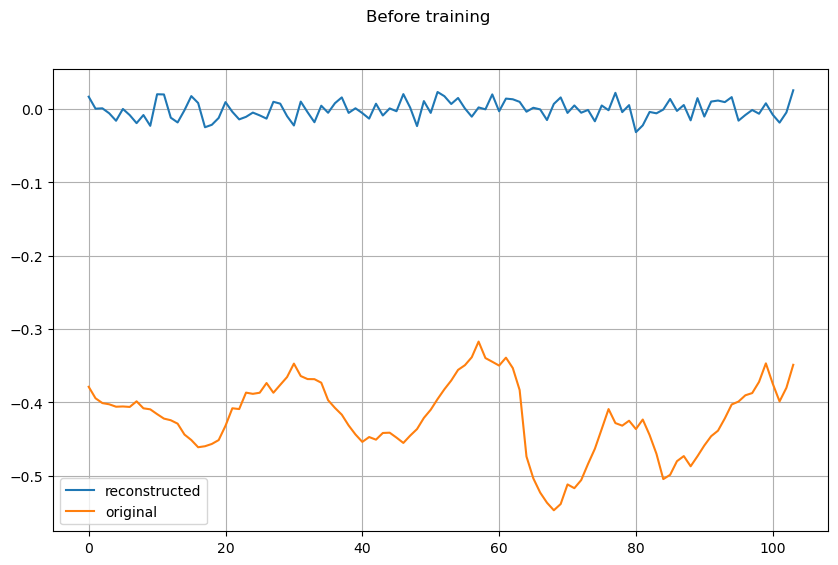

In [117]:
plot_orig_vs_recon('Before training')

Epoch 1/1000
495/495 [==============================] - 1s 1ms/step - loss: 0.1184
Epoch 2/1000
495/495 [==============================] - 1s 1ms/step - loss: 0.0229
Epoch 3/1000
495/495 [==============================] - 1s 1ms/step - loss: 0.0191
Epoch 4/1000
495/495 [==============================] - 1s 1ms/step - loss: 0.0170
Epoch 5/1000
495/495 [==============================] - 1s 1ms/step - loss: 0.0149
Epoch 6/1000
495/495 [==============================] - 1s 1ms/step - loss: 0.0134
Epoch 7/1000
495/495 [==============================] - 1s 1ms/step - loss: 0.0119
Epoch 8/1000
495/495 [==============================] - 1s 1ms/step - loss: 0.0117
Epoch 9/1000
495/495 [==============================] - 1s 2ms/step - loss: 0.0110
Epoch 10/1000
495/495 [==============================] - 1s 2ms/step - loss: 0.0109
Epoch 11/1000
495/495 [==============================] - 1s 2ms/step - loss: 0.0113
Epoch 12/1000
495/495 [==============================] - 1s 2ms/step - loss: 0.0098
E

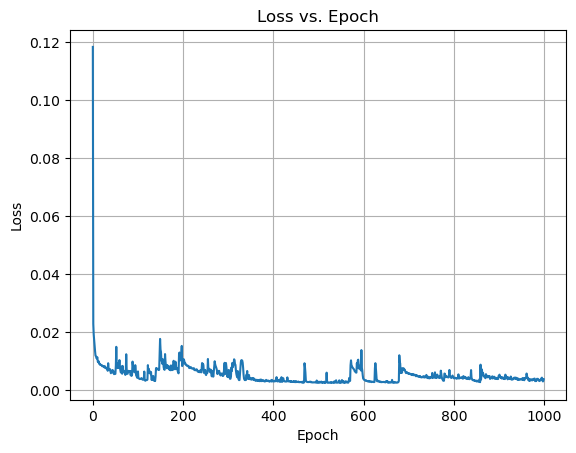

In [309]:
autoencoder_epochs = 100
model_history = autoencoder.fit(X_train_scaled, X_train_scaled, epochs=autoencoder_epochs, batch_size=50, verbose=1,)

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

In [310]:
# At epoch 100, our loss is around 0.003 which seems pretty solid
model_history.history['loss'][-1]

0.0037362482398748398

In [311]:
actual = X_test_scaled[0]
display(actual)
actual.shape

array([-0.37871629, -0.39439379, -0.40093081, -0.40256942, -0.40587113,
       -0.4055286 , -0.40616753, -0.39850713, -0.40803126, -0.40944616,
       -0.41596645, -0.42207166, -0.42431282, -0.42896172, -0.44382521,
       -0.45128161, -0.46111859, -0.45976248, -0.45664175, -0.4513813 ,
       -0.43184679, -0.40799744, -0.40906508, -0.38668096, -0.38831535,
       -0.38680112, -0.3735883 , -0.38681821, -0.37606981, -0.36543688,
       -0.34709906, -0.36407059, -0.36818437, -0.36832506, -0.37314952,
       -0.39699252, -0.40749381, -0.41672225, -0.43138967, -0.44369852,
       -0.45384759, -0.44721784, -0.45079071, -0.4416701 , -0.44131497,
       -0.44815825, -0.45536629, -0.44530514, -0.43634424, -0.42116135,
       -0.41000106, -0.39548607, -0.38210183, -0.37015448, -0.35565646,
       -0.34927098, -0.33843893, -0.31707034, -0.33952894, -0.34458692,
       -0.34977451, -0.33899423, -0.35317378, -0.38312026, -0.47374847,
       -0.50350401, -0.52290844, -0.53680472, -0.54728856, -0.53

(104,)

In [312]:
# reshape to size (1, 104) to represent a batch of 1
predicted = autoencoder.predict(X_test_scaled[0].reshape(1, -1), batch_size=1).flatten()
display(predicted)
predicted.shape

1/1 [==============================] - 0s 50ms/step


array([-0.38137323, -0.39800486, -0.40575433, -0.40854734, -0.41291815,
       -0.41430786, -0.41683435, -0.4099332 , -0.4187582 , -0.42042485,
       -0.4249476 , -0.4313305 , -0.43308878, -0.43988   , -0.44904226,
       -0.4524753 , -0.45709112, -0.45240203, -0.44717485, -0.44328558,
       -0.42627072, -0.40543276, -0.40797263, -0.38632214, -0.38857532,
       -0.38658124, -0.37284428, -0.3860532 , -0.37487406, -0.36136574,
       -0.3421843 , -0.3606047 , -0.36212885, -0.36235267, -0.36788487,
       -0.391595  , -0.40265757, -0.41413003, -0.42999905, -0.44680744,
       -0.45853737, -0.4517637 , -0.45317152, -0.44382983, -0.44068086,
       -0.44464067, -0.45022404, -0.44636875, -0.4429639 , -0.4321257 ,
       -0.42419654, -0.4066225 , -0.38954854, -0.37553692, -0.35688713,
       -0.34781152, -0.33546034, -0.31268242, -0.33305588, -0.33822152,
       -0.344056  , -0.33331397, -0.34693348, -0.3788674 , -0.4767025 ,
       -0.5091368 , -0.5300611 , -0.54264206, -0.54804903, -0.53

(104,)

In [313]:
actual - predicted

array([ 0.00265694,  0.00361107,  0.00482352,  0.00597792,  0.00704702,
        0.00877927,  0.01066683,  0.01142607,  0.01072695,  0.01097869,
        0.00898113,  0.00925884,  0.00877596,  0.01091829,  0.00521705,
        0.0011937 , -0.00402746, -0.00736046, -0.00946691, -0.00809572,
       -0.00557607, -0.00256468, -0.00109245, -0.00035882,  0.00025997,
       -0.00021988, -0.00074402, -0.00076501, -0.00119575, -0.00407115,
       -0.00491476, -0.00346588, -0.00605552, -0.00597239, -0.00526465,
       -0.00539752, -0.00483625, -0.00259222, -0.00139062,  0.00310892,
        0.00468978,  0.00454585,  0.00238081,  0.00215974, -0.00063411,
       -0.00351758, -0.00514225,  0.00106361,  0.00661966,  0.01096434,
        0.01419549,  0.01113643,  0.00744671,  0.00538244,  0.00123067,
       -0.00145946, -0.0029786 , -0.00438792, -0.00647305, -0.0063654 ,
       -0.0057185 , -0.00568026, -0.00624029, -0.00425287,  0.00295405,
        0.00563278,  0.00715269,  0.00583734,  0.00076047, -0.00

In [314]:
# 1000 epoch model is around 95% accurate in reconstruction
distance = np.linalg.norm(actual - predicted)
distance

0.06774686031934758

After training, while the autoencoder isn't perfect, it's still able to identify features of the graph like peaks and dips, and is mostly on point. Seems to work fairly effectively.

1/1 [==============================] - 0s 46ms/step


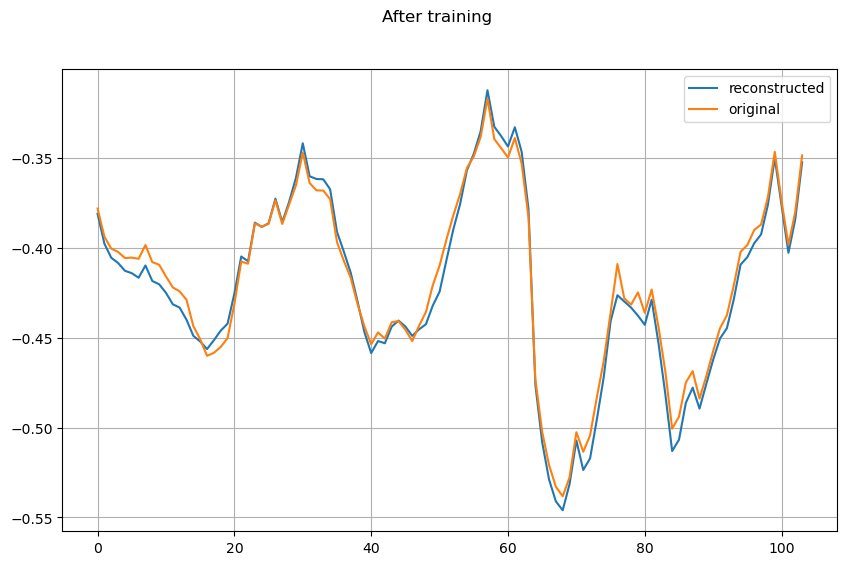

In [315]:
plot_orig_vs_recon('After training')

Now, we plot the 2D data generated by our encoder and try to identify clusters to see what the best method would be here

In [316]:
X_test_scaled.shape

(6178, 104)

In [318]:
encoded_X_test = encoder.predict(X_test_scaled, batch_size=6178)
encoded_X_test.shape

1/1 [==============================] - 0s 18ms/step


(6178, 2)

Text(0, 0.5, 'Latent Dimension 2')

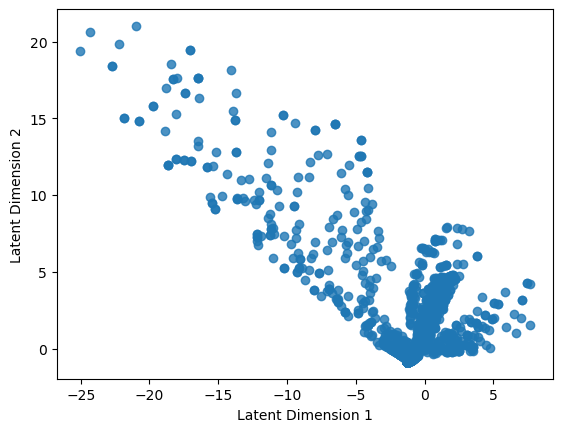

In [319]:
plt.scatter(encoded_X_test[:, 0], encoded_X_test[:, 1], alpha=.8)
plt.xlabel('Latent Dimension 1')
plt.ylabel('Latent Dimension 2')

So far compared to the PCA graph it looks a little bit better, but we need to see it against each feature to really see if it clustered well.

In [320]:
def plot_encoded_against_single_feature(feature: str):

    arr = y_test[feature].values
    normalized_values = (arr - np.min(arr)) / (np.max(arr) - np.min(arr))

    plt.scatter(encoded_X_test[:, 0], encoded_X_test[:, 1], s = 4, c=[(normalized_values[i], normalized_values[i], 0) for i in range(len(normalized_values))])
    plt.title(f'Autoencoder Graph - {feature}')
    plt.xlabel('Latent Dimension 1')
    plt.ylabel('Latent Dimension 2')

### Observations

Temperature - it's similar to the PCA graph in that the lowest temperature values are all concentrated around one singular point. However, the change in values is much more and more gradual. Clusters don't seem super organized but it is better than PCA.

C/O Ratio - this was the feature that was the best out of 4 in the PCA graphs, and I think this one does it good as well. There seem to be 3 distinct zones where C/O ratio differs. The only issue is the middle value zone is pretty spread out, but it's still an improvement.

Metallicity - along with temperature, this feature was represented poorly in PCA. Here, although values are still fairly intermingled, it's definitely far better than the PCA plot.

Gravity - Almost like an inverted version of the metallicity graph done by the autoencoder, it's similarly better than its PCA counterpart.

***OVERALL***: Autoencoder seems to be the best of the 2 methods

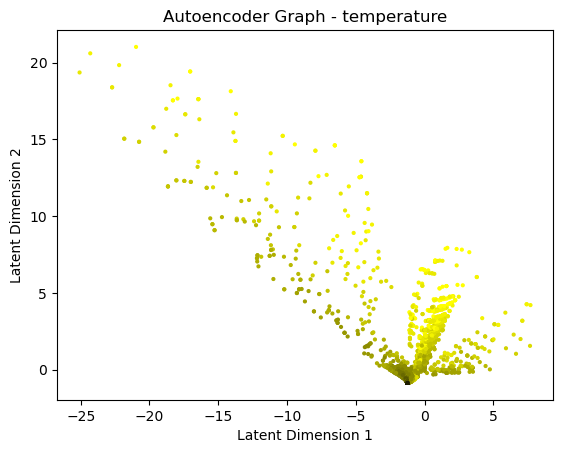

In [321]:
plot_encoded_against_single_feature('temperature')

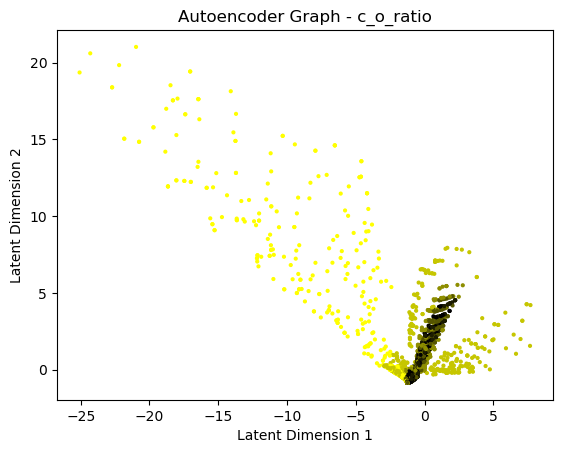

In [322]:
plot_encoded_against_single_feature('c_o_ratio')

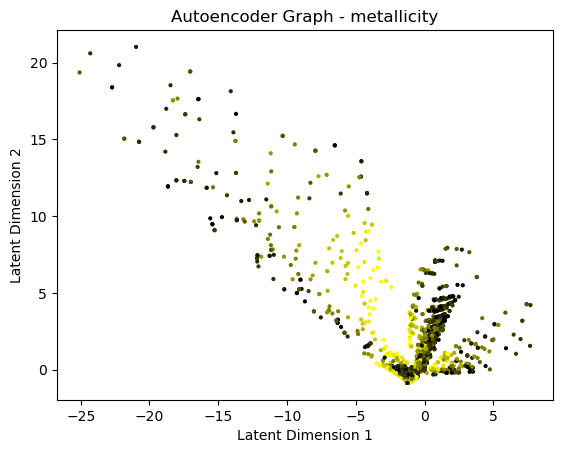

In [323]:
plot_encoded_against_single_feature('metallicity')

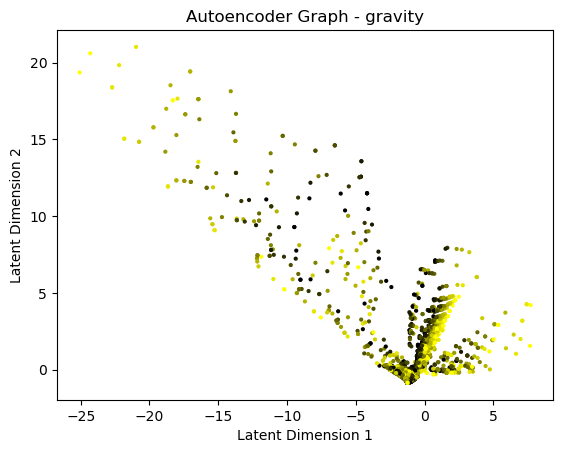

In [324]:
plot_encoded_against_single_feature('gravity')

We save the model weights, architecture, and history to our data path

model_name = 'autoencoder_100epochs_loss3e-3'


path_weights = os.path.join(__reference_data_path__,
                         f'trained_ML_models/trained_weights_{model_name}.h5',
                         )

autoencoder.save_weights(path_weights)

path_architecture = os.path.join(__reference_data_path__,
                         f'trained_ML_models/trained_architecture_{model_name}.h5'
                         )

path_history = os.path.join(__reference_data_path__,
                         f'trained_ML_models/trained_history_{model_name}.pkl',
                         )

autoencoder.save(path_architecture)

with open(path_history, 'wb') as file:
            pk.dump(autoencoder.history, file)

temp_ae = Model(inputs=encoder.input, outputs=decoder(encoder.output))
temp_ae.load_weights(os.path.join(
    __reference_data_path__, "trained_ML_models/autoencoder/trained_weights_autoencoder_100epochs_loss3e-3.h5"
))

temp_ae.summary()

In [135]:
autoencoder.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14_input (InputLayer  [(None, 104)]             0         
 )                                                               
                                                                 
 dense_14 (Dense)            (None, 52)                5460      
                                                                 
 dense_15 (Dense)            (None, 26)                1378      
                                                                 
 dense_16 (Dense)            (None, 10)                270       
                                                                 
 dense_17 (Dense)            (None, 2)                 22        
                                                                 
 sequential_5 (Sequential)   (None, 104)               6664      
                                                           

In [136]:
from TelescopeML.DimensionalityReducer import *

In [325]:
edmodel = EncoderDecoderModel(train_BD)
edmodel.standardize_and_split_train_test(0.2)
edmodel.load_decoder_weights()
edmodel.load_encoder_weights()

In [327]:
encoder = edmodel.encoder
decoder = edmodel.decoder
encoder.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_42 (Dense)            (None, 52)                5460      
                                                                 
 dense_43 (Dense)            (None, 26)                1378      
                                                                 
 dense_44 (Dense)            (None, 10)                270       
                                                                 
 dense_45 (Dense)            (None, 2)                 22        
                                                                 
Total params: 7130 (27.85 KB)
Trainable params: 7130 (27.85 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


1/1 [==============================] - 0s 39ms/step


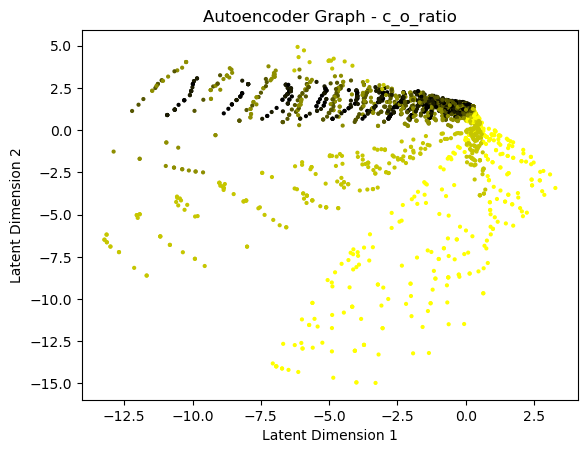

In [328]:
# Loaded trained encoder & decoder
edmodel.plot_encoded_against_single_feature('c_o_ratio')

In [145]:
autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer=Adam())

## Gaussian Mixture Models

To start, I'll make a model to predict C/O ratio as it seems to be the most evenly divided dataset, with 3 fairly clear sections. My only concern is that the clusters would be too far out to be effective, but we will see.

In [146]:
edmodel.X_train_scaled.shape

(24710, 104)

In [147]:
train_encoded_space = encoder.predict(x=edmodel.X_train_scaled, batch_size=edmodel.X_train_scaled.shape[0])
test_encoded_space = encoder.predict(x=edmodel.X_test_scaled, batch_size=edmodel.X_test_scaled.shape[0])

1/1 [==============================] - 0s 39ms/step


In [22]:
train_encoded_space.shape

(24710, 2)

In [30]:
from sklearn.mixture import GaussianMixture

gmm = GaussianMixture(n_components=3).fit(train_encoded_space)

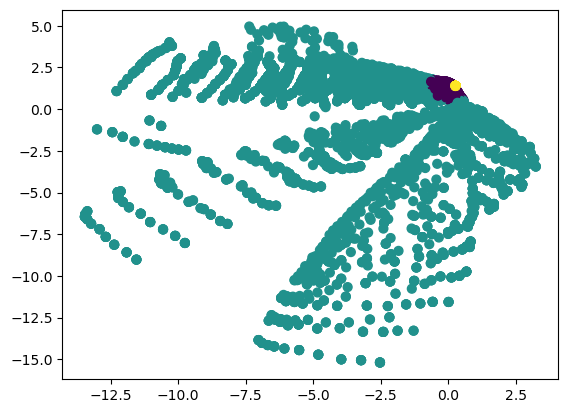

In [31]:
labels = gmm.predict(train_encoded_space)
plt.scatter(train_encoded_space[:, 0], train_encoded_space[:, 1], c=labels, s=40, cmap='viridis')

If we compare this to our C/O ratio graph from our autoencoder, it's clear these clusters are far off of our ideal result. Let's try setting initial centers manually.

In [32]:
center1 = (-5.0, 2.0)
center2 = (-5.0, -2.5)
center3 = (0.0, -5.0)

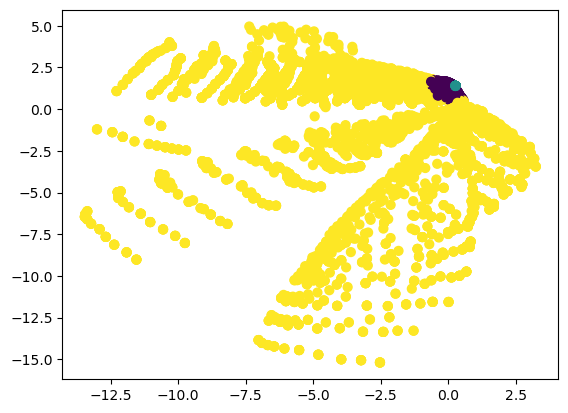

In [34]:
gmm = GaussianMixture(n_components=3, means_init=[center1, center2, center3]).fit(train_encoded_space)
labels = gmm.predict(train_encoded_space)
plt.scatter(train_encoded_space[:, 0], train_encoded_space[:, 1], c=labels, s=40, cmap='viridis')

Setting initial cluster centers does not do much due to the high concentration of points at the one specific area. What if we used different covariance types?

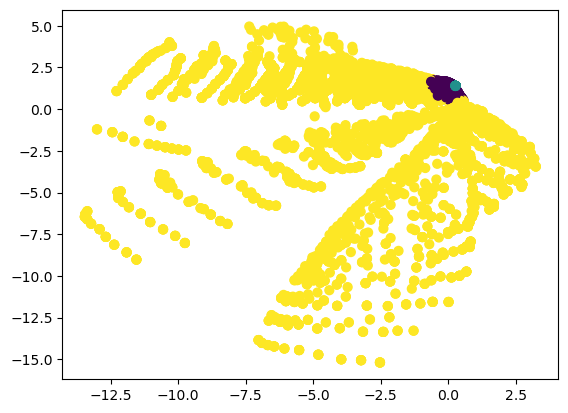

In [45]:
gmm = GaussianMixture(n_components=3, means_init=[center1, center2, center3], covariance_type='full').fit(train_encoded_space)
labels = gmm.predict(train_encoded_space)
plt.scatter(train_encoded_space[:, 0], train_encoded_space[:, 1], c=labels, s=40, cmap='viridis')

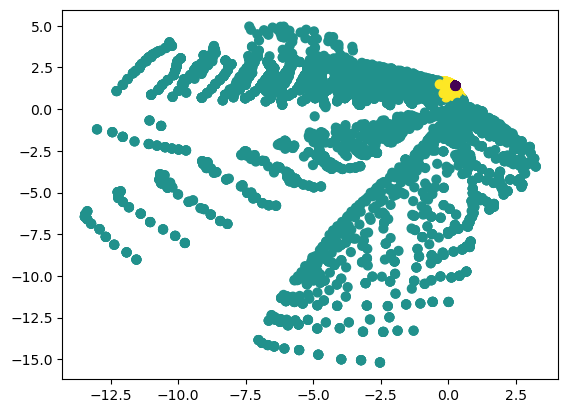

In [47]:
gmm = GaussianMixture(n_components=3, means_init=[center1, center2, center3], covariance_type='diag').fit(train_encoded_space)
labels = gmm.predict(train_encoded_space)
plt.scatter(train_encoded_space[:, 0], train_encoded_space[:, 1], c=labels, s=40, cmap='viridis')

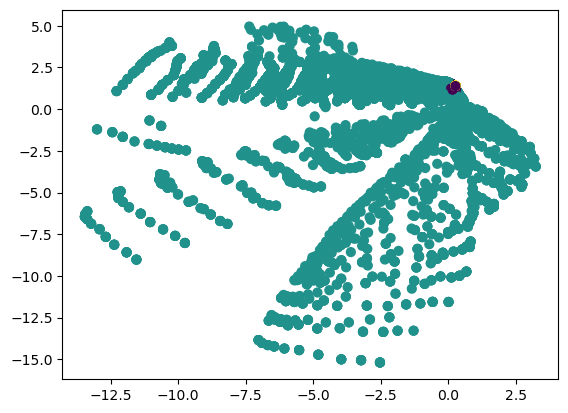

In [48]:
gmm = GaussianMixture(n_components=3, means_init=[center1, center2, center3], covariance_type='spherical').fit(train_encoded_space)
labels = gmm.predict(train_encoded_space)
plt.scatter(train_encoded_space[:, 0], train_encoded_space[:, 1], c=labels, s=40, cmap='viridis')

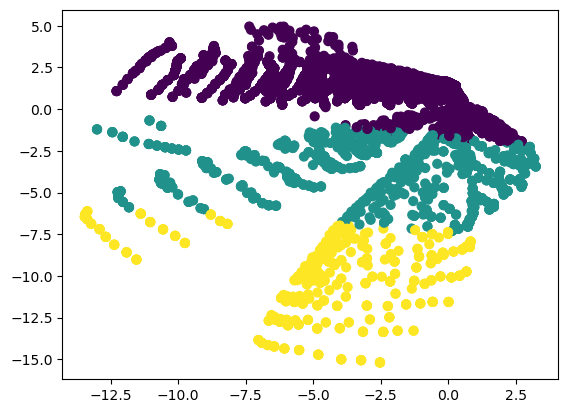

In [41]:
gmm = GaussianMixture(n_components=3, means_init=[center1, center2, center3], covariance_type='tied').fit(train_encoded_space)
labels = gmm.predict(train_encoded_space)
plt.scatter(train_encoded_space[:, 0], train_encoded_space[:, 1], c=labels, s=40, cmap='viridis')

It looks like tied covariance matrices work the best since it does not rely so much on density. Now, we explore different component amounts and compare their clusters side-by-side

Text(0.5, 0, 'n_components')

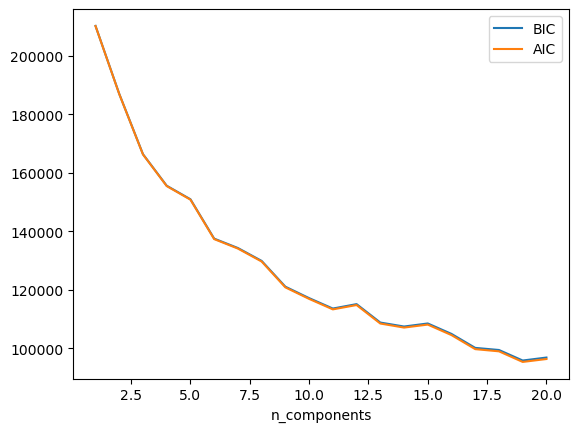

In [49]:
n_components = np.arange(1, 21)
models = [GaussianMixture(n, covariance_type='tied').fit(train_encoded_space)
          for n in n_components]

plt.plot(n_components, [m.bic(train_encoded_space) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train_encoded_space) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

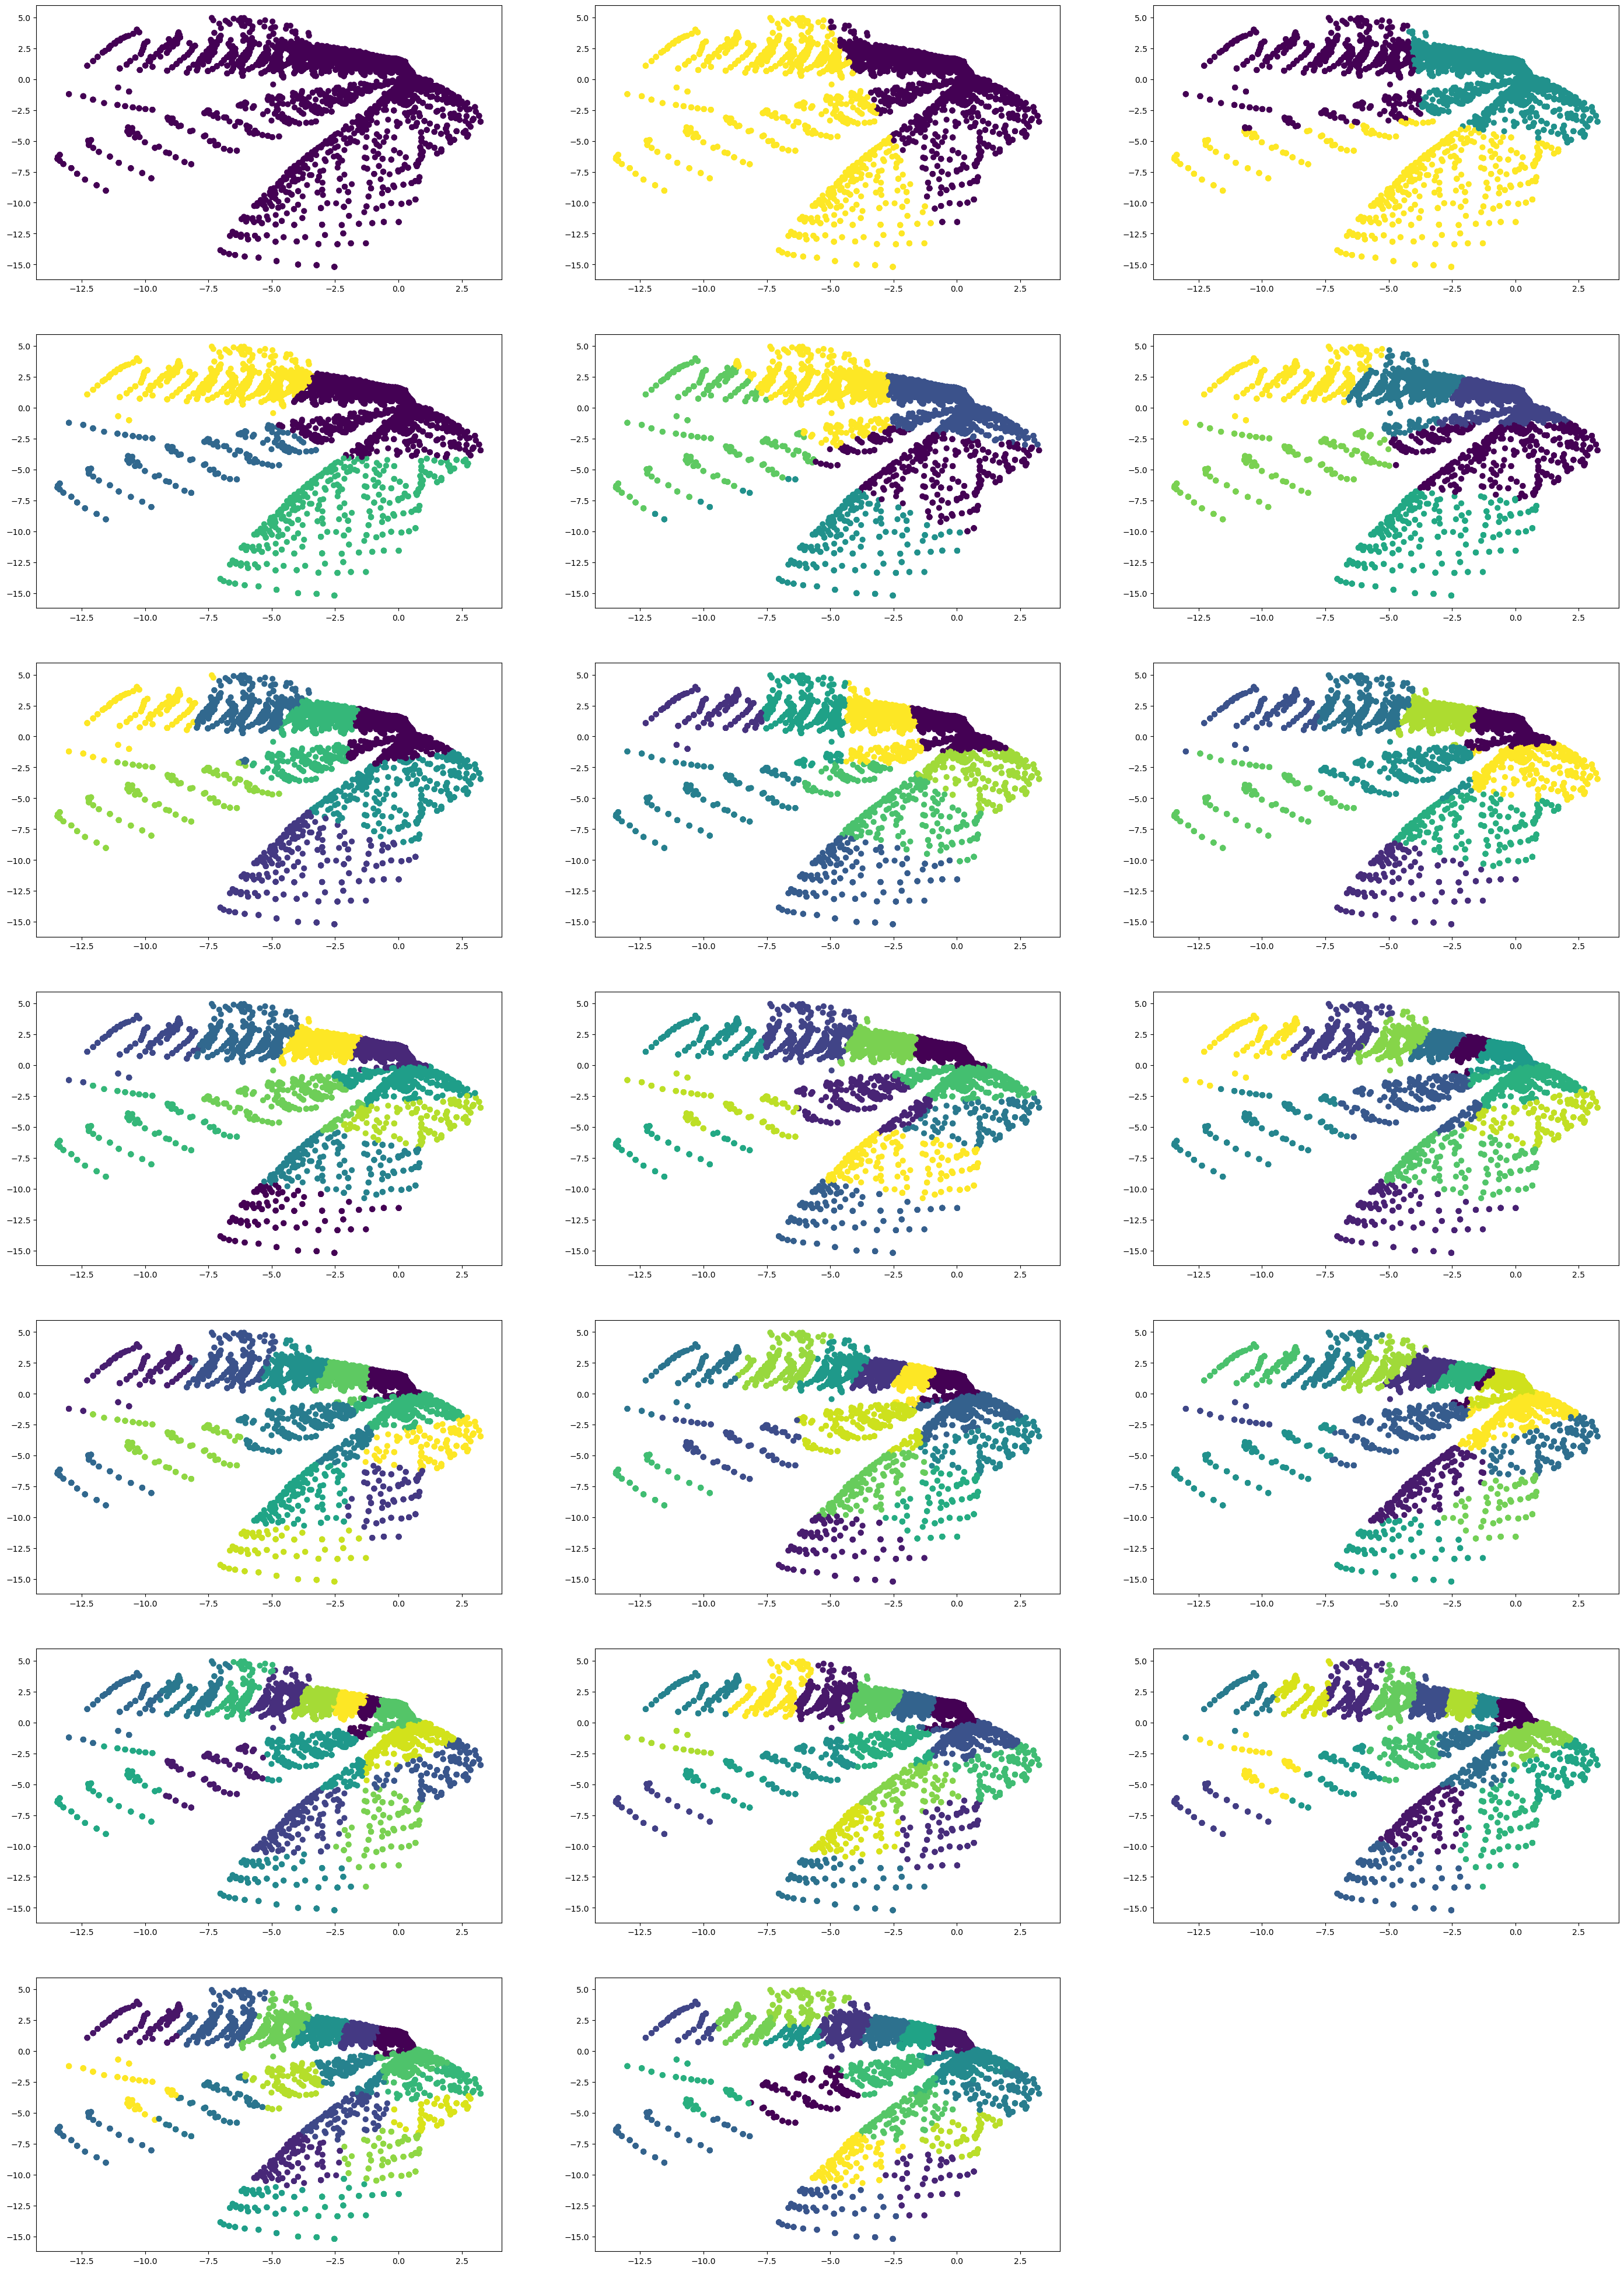

In [60]:
# Show 1 - 20 clusters. NOTE: no starting cluster values given
figure = plt.figure(figsize=(35, 50))
for i, model in enumerate(models):
    sp = figure.add_subplot(7, 3, i+1)
    plt.scatter(train_encoded_space[:, 0], train_encoded_space[:, 1], c=models[i].predict(train_encoded_space), s=40, cmap='viridis')

Now, since we have made clusters on our plot, if we want to make a prediction with a new set of data we will need to do a few steps:

1. Reduce our input vector to 2 dimensions (encoder)
2. Identify probabilities of our new point belonging to each cluster (GMM)
3. For each cluster, find all points belonging to it (decoder)
4. Get mean values of each parameter (temp, c/o, gravity, metallicity) for every cluster
5. Add weighted sum to get output values for our new point (GMM)

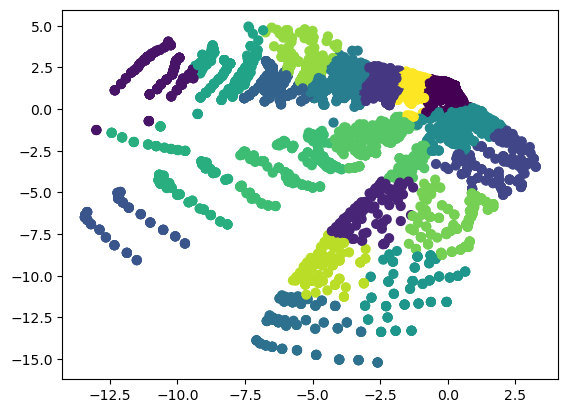

In [162]:
# Let's use the 20-cluster model for now since can somewhat make different "branches"
gmm = models[19].fit(train_encoded_space)
labels = gmm.predict(train_encoded_space)
plt.scatter(train_encoded_space[:, 0], train_encoded_space[:, 1], c=labels, s=40, cmap='viridis')

In [163]:
test_encoded_space

array([[-3.1194847 ,  0.58611846],
       [ 0.256819  ,  1.4114428 ],
       [ 0.25698152,  1.4124548 ],
       ...,
       [-4.7636547 ,  2.2985952 ],
       [ 0.14830142,  1.1808673 ],
       [ 0.25698268,  1.4124566 ]], dtype=float32)

In [164]:
test_encoded_space.shape

(6178, 2)

In [165]:
y_test.head()

gravity  c_o_ratio  metallicity  temperature
20290     5.25       2.00          1.7          400
13045     4.25       0.50         -0.7          350
24217     5.00       1.00         -0.7          300
29671     3.50       0.25          0.7          250
27234     4.25       0.50          0.5          450

In [166]:
y_test.shape

(6178, 4)

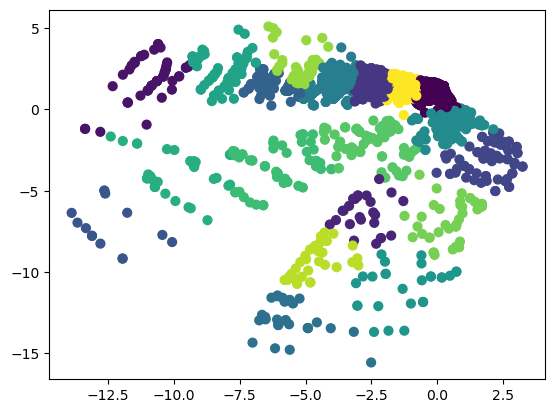

In [168]:
test_labels = gmm.predict(test_encoded_space)
plt.scatter(test_encoded_space[:, 0], test_encoded_space[:, 1], c=test_labels, s=40, cmap='viridis')

In [152]:
probs = gmm.predict_proba(test_encoded_space)
print(probs[:10].round(4))

[[0.     0.     0.     0.     0.     0.     0.     0.7666 0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.2334]
 [1.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.2622 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.7378 0.     0.    ]
 [1.     0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]
 [0.7093 0.     0.     0.     0.     0.     0.     0.     0.     0.
  0.     0.     0.     0.     0.     0.     0.     0.2907 0.     0.    ]
 [0.     0.  

In [154]:
gmm.predict_proba([(0, 0)])

array([[9.89162912e-001, 1.20368617e-058, 1.28158845e-198,
        4.76381272e-074, 4.52507257e-028, 0.00000000e+000,
        0.00000000e+000, 3.47836489e-018, 1.08347121e-002,
        3.27495129e-084, 2.23820190e-057, 2.03357109e-149,
        2.34698103e-253, 9.42410838e-279, 6.90432709e-173,
        2.79215374e-015, 1.10951300e-116, 2.37640444e-006,
        9.13365152e-166, 5.36450604e-041]])

In [169]:
display(labels)

array([ 0,  0, 17, ...,  4,  0,  4], dtype=int64)

In [304]:
# Use hard assignment to assign average values to each cluster
# and soft assignment for individual predictions
cluster_count = 20

y_test_averages = [] 

for i in range(cluster_count):

    # Get all indices where the point is part of ith cluster
    cluster_points = np.where(labels == i)
    if len(cluster_points[0]) == 0:
        y_test_averages.append(np.array([0, 0, 0, 0]))
        continue

    # average the Y values with our subset of points, and add to the list
    cluster_y_avg = np.mean(y_train.values[cluster_points], axis=0)

    y_test_averages.append(cluster_y_avg)

    print(f"Average for cluster #{i+1}: {cluster_y_avg}")

# cluster 19 doesn't seem to have any points assigned to it. In this case we shouldn't consider it in our probabilities, by dropping that column & normalizing

C:\Users\abhin\AppData\Local\Temp\ipykernel_21076\3816148575.py:10: DeprecationWarning: Calling nonzero on 0d arrays is deprecated, as it behaves surprisingly. Use `atleast_1d(cond).nonzero()` if the old behavior was intended. If the context of this warning is of the form `arr[nonzero(cond)]`, just use `arr[cond]`.
  cluster_points = np.where(labels == i)


In [195]:
X_test.head()

2.512         2.487         2.462         2.438         2.413  \
20290  2.258949e-13  1.910139e-13  1.167601e-13  1.481240e-14  2.792723e-15   
13045  2.854241e-11  3.377244e-11  2.977030e-11  1.120344e-11  5.367351e-12   
24217  2.133617e-12  2.386002e-12  1.577230e-12  4.151594e-13  1.324991e-13   
29671  8.355343e-14  6.222715e-14  4.066446e-14  8.785724e-15  2.318966e-15   
27234  9.387658e-11  1.137820e-10  1.192570e-10  4.893054e-11  2.477359e-11   

              2.389         2.366         2.342         2.319         2.296  \
20290  1.585465e-16  4.587483e-17  1.139428e-17  1.327170e-16  5.408906e-18   
13045  2.105156e-12  1.225894e-12  3.678087e-13  1.153654e-12  4.370059e-13   
24217  3.662675e-14  1.532719e-14  4.022845e-15  2.374973e-14  3.214293e-15   
29671  2.463482e-16  1.024272e-16  1.393060e-17  1.296990e-16  6.697632e-18   
27234  8.821073e-12  5.551191e-12  1.488659e-12  4.916069e-12  1.844834e-12   

       ...         0.981         0.971         0.962         0.952  \
20290  ...  4.953896e-15  1.395618e-14  1.284398e-15  2.792601e-16   
13045  ...  5.431980e-11  3.911892e-11  8.416970e-12  4.507788e-12   
24217  ...  2.597803e-11  1.382472e-11  1.517884e-12  4.472751e-13   
29671  ...  3.883028e-16  1.846444e-15  1.410594e-16  2.185616e-17   
27234  ...  8.688089e-11  6.384417e-11  1.814665e-11  1.287293e-11   

              0.943         0.933         0.924         0.915         0.906  \
20290  6.112138e-16  1.350684e-17  5.276110e-14  7.150146e-15  2.802500e-16   
13045  6.958806e-12  7.520618e-13  4.048988e-11  3.736248e-11  3.087626e-11   
24217  1.382792e-12  5.828435e-14  3.300628e-11  2.657812e-11  2.008885e-11   
29671  2.849767e-17  7.641152e-19  3.847134e-15  1.253651e-15  2.624500e-16   
27234  1.589320e-11  2.599212e-12  7.660836e-11  6.708509e-11  4.911528e-11   

              0.897  
20290  1.444406e-17  
13045  9.456151e-12  
24217  3.041770e-12  
29671  1.295081e-17  
27234  1.548230e-11  

[5 rows x 104 columns]

In [196]:
y_test.head()

gravity  c_o_ratio  metallicity  temperature
20290     5.25       2.00          1.7          400
13045     4.25       0.50         -0.7          350
24217     5.00       1.00         -0.7          300
29671     3.50       0.25          0.7          250
27234     4.25       0.50          0.5          450

In [199]:
X_test.iloc[0].values

array([2.25894932e-13, 1.91013870e-13, 1.16760064e-13, 1.48124043e-14,
       2.79272254e-15, 1.58546542e-16, 4.58748342e-17, 1.13942843e-17,
       1.32717046e-16, 5.40890587e-18, 6.59278767e-18, 1.02425198e-17,
       6.30088527e-17, 2.15247718e-16, 2.82047825e-14, 1.98131204e-13,
       2.30403021e-12, 1.25170495e-11, 2.22001058e-11, 7.87433584e-12,
       1.06676281e-12, 1.56991290e-13, 1.07159252e-14, 9.75175958e-15,
       2.20634959e-15, 6.77549010e-16, 1.61755164e-16, 7.41707416e-16,
       2.71427980e-15, 3.52081435e-15, 9.44098293e-16, 3.97898597e-16,
       7.16738753e-16, 4.48682698e-16, 2.03637576e-15, 1.06158974e-16,
       8.20901196e-16, 8.58818683e-17, 1.08806803e-16, 1.48156060e-17,
       4.92245100e-16, 9.30568652e-16, 4.76165207e-16, 6.30614849e-16,
       7.07876300e-14, 2.10164521e-12, 1.58129161e-12, 3.33811976e-13,
       8.14897995e-15, 4.39399670e-16, 6.73257666e-17, 2.21552074e-17,
       3.64662396e-18, 1.25677549e-17, 4.81001960e-16, 2.48844395e-16,
      

In [213]:
# try making a prediction with the first point in our test set
# this uses our encoder output for test set
example_encoded_space = np.array([test_encoded_space[0]])
example_encoded_space

array([[-3.1194847 ,  0.58611846]], dtype=float32)

In [214]:
cluster_prediction = gmm.predict_proba(example_encoded_space)
print(probs.round(4))

[[0.     0.     0.     0.7866 0.     0.     0.     0.     0.2134 0.
  0.     0.     0.     0.     0.     0.     0.     0.     0.     0.    ]]


In [215]:
# we use probability of point falling within each cluster as our weights
# when we average the mean values for each cluster
estimated_features = np.average(y_test_averages, axis=0, weights=cluster_prediction[0])
estimated_features

array([4.26500720e+00, 1.27712279e+00, 3.86482074e-01, 9.82104283e+02])

In [216]:
# verifying answer
0.7866 * y_test_averages[3] + 0.2134 * y_test_averages[8]

array([4.26500737e+00, 1.27712316e+00, 3.86481991e-01, 9.82104299e+02])

In [229]:
# final prediction
prediction = pd.DataFrame([estimated_features], columns=['gravity', 'c_o_ratio', 'metallicity', 'temperature'])
prediction

gravity  c_o_ratio  metallicity  temperature
0  4.265007   1.277123     0.386482   982.104283

In [230]:
actual = y_test.iloc[0]
actual

gravity          5.25
c_o_ratio        2.00
metallicity      1.70
temperature    400.00
Name: 20290, dtype: float64

Seems our prediction for the first value was off by a significant amount. This might be because the top-right cluster, the densest spot, has high and low values of all kinds, even though it's grouped as one. Let's evaluate the predictions for the entire test set and figure out accuracy. | (actual - expected) / expected |

In [231]:
test_encoded_space

array([[-3.1194847 ,  0.58611846],
       [ 0.256819  ,  1.4114428 ],
       [ 0.25698152,  1.4124548 ],
       ...,
       [-4.7636547 ,  2.2985952 ],
       [ 0.14830142,  1.1808673 ],
       [ 0.25698268,  1.4124566 ]], dtype=float32)

In [232]:
test_cluster_predictions = gmm.predict_proba(test_encoded_space)
test_cluster_predictions[:3].round(4)

array([[0.    , 0.    , 0.    , 0.7866, 0.    , 0.    , 0.    , 0.    ,
        0.2134, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    ],
       [0.953 , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.047 , 0.    ],
       [0.953 , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.047 , 0.    ]])

In [247]:
percent_error_each = []
predictions = []

for i, prob in enumerate(test_cluster_predictions):
    estimated_features = np.average(y_test_averages, axis=0, weights=test_cluster_predictions[i])
    actual_features = y_test.iloc[i]

    print(estimated_features[1], actual_features[1])

    predictions.append(estimated_features)
    percent_error_each.append(np.abs((actual_features - estimated_features) / actual_features))

1.277122786155694 2.0
1.2314866614855602 0.5
1.231486954230678 1.0
1.231486015467074 0.25
1.263846439476899 0.5
1.2314869550977228 1.0
1.2414066048503338 0.5
1.2408756627821982 1.0
1.2314869548346206 1.0
1.2441907517671895 1.5
1.231486953637284 1.0
1.2314201736180912 0.5
1.322635135135135 2.0
1.2314550400228674 1.5
1.2314862068155827 2.5
1.2314801544488025 2.5
1.231451477275517 0.25
1.2847638775985497 0.5
1.231452743937067 1.0
1.2314864245366661 0.5
1.231486012412555 2.5
1.2314869530879193 1.0
1.3045856974776275 1.5
1.2314869097975518 1.5
1.231486953871684 1.0
1.2313962975769415 1.0
1.2314728874353262 2.5
1.2314832920013605 1.5
1.2314820469793764 0.25
1.2741011320596496 1.5
1.2314869546918714 1.5
1.2314869544994367 2.5
1.2314869550977228 0.5
1.2314869550207492 1.0
1.2314862461584886 0.5
1.285182927572921 2.0
1.3087378112462298 0.25
1.2712934083806502 0.25
1.2314022558324018 0.25
1.267045454545455 0.5
1.2314869550865246 0.25
1.2314869513838334 0.25
1.2670454545459366 1.0
1.2314869509076

In [248]:
[x[1] for x in percent_error_each[:5]]

[0.361438606922153,
 1.4629733229711204,
 0.2314869542306781,
 3.9259440618682957,
 1.5276928789537978]

In [242]:
np.mean(percent_error_each)

0.8194864161321458

In [385]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential, Model
from keras.layers import Dense, BatchNormalization
import random


# Values will be encoded in a 2D space for clustering
output_dim = 20

# starting with 104 dimensions from spectra
input_dim = 104

# Encoder model 104 -> 60 -> 35 -> 20 layers
encoder = Sequential([
    Dense(60, activation='relu', input_shape=(input_dim,)),
    Dense(35, activation='relu'),
    Dense(output_dim, activation='linear')
])

# Decoder model 20 -> 35 -> 60 -> 104 layers
decoder = Sequential([
    Dense(35, activation='relu', input_shape=(output_dim,)),
    Dense(60, activation='relu'),
    Dense(input_dim, activation='linear')
])

In [393]:
encoder.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 60)                6300      
                                                                 
 dense_62 (Dense)            (None, 35)                2135      
                                                                 
 dense_63 (Dense)            (None, 20)                720       
                                                                 
Total params: 9155 (35.76 KB)
Trainable params: 9155 (35.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [394]:
decoder.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_64 (Dense)            (None, 35)                735       
                                                                 
 dense_65 (Dense)            (None, 60)                2160      
                                                                 
 dense_66 (Dense)            (None, 104)               6344      
                                                                 
Total params: 9239 (36.09 KB)
Trainable params: 9239 (36.09 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [386]:
def plot_orig_vs_recon(title=''):
    fig = plt.figure(figsize=(10,6))
    plt.suptitle(title)

    sample = random.choice(X_test_scaled)

    # Plot the reconstructed X values
    plt.plot(autoencoder.predict(sample.reshape(1, -1)).flatten(), label='reconstructed')

    # plot the original X values
    plt.plot(sample, label='original')

    plt.legend()
    plt.grid(True)

1/1 [==============================] - 0s 98ms/step


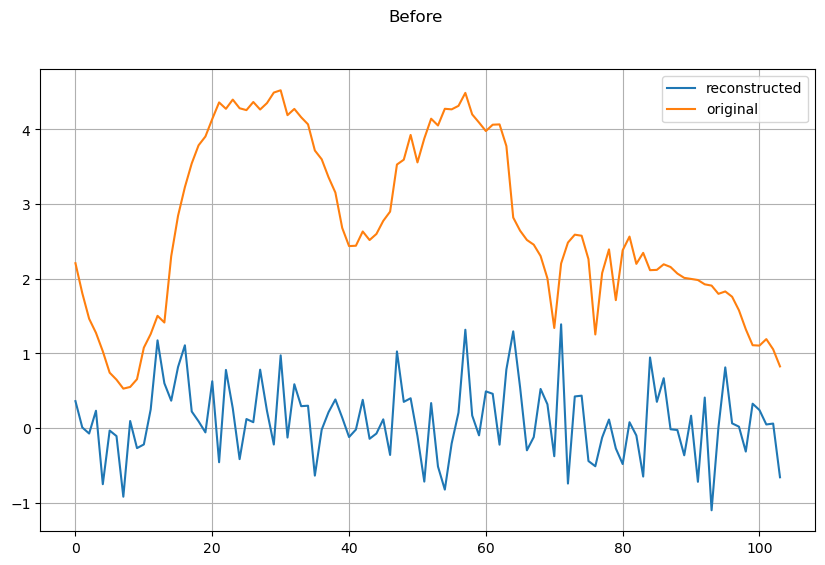

In [387]:
from keras.optimizers import Adam

autoencoder = Model(inputs=encoder.input, outputs=decoder(encoder.output))
autoencoder.compile(loss='mse', optimizer=Adam())

plot_orig_vs_recon('Before')

Epoch 1/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0536
Epoch 2/100
495/495 [==============================] - 1s 1ms/step - loss: 0.0027
Epoch 3/100
495/495 [==============================] - 1s 1ms/step - loss: 0.0022
Epoch 4/100
495/495 [==============================] - 1s 1ms/step - loss: 0.0023
Epoch 5/100
495/495 [==============================] - 1s 1ms/step - loss: 0.0016
Epoch 6/100
495/495 [==============================] - 1s 1ms/step - loss: 0.0014
Epoch 7/100
495/495 [==============================] - 1s 1ms/step - loss: 0.0010
Epoch 8/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0021
Epoch 9/100
495/495 [==============================] - 1s 2ms/step - loss: 7.0895e-04
Epoch 10/100
495/495 [==============================] - 1s 3ms/step - loss: 0.0019
Epoch 11/100
495/495 [==============================] - 1s 3ms/step - loss: 6.4183e-04
Epoch 12/100
495/495 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch

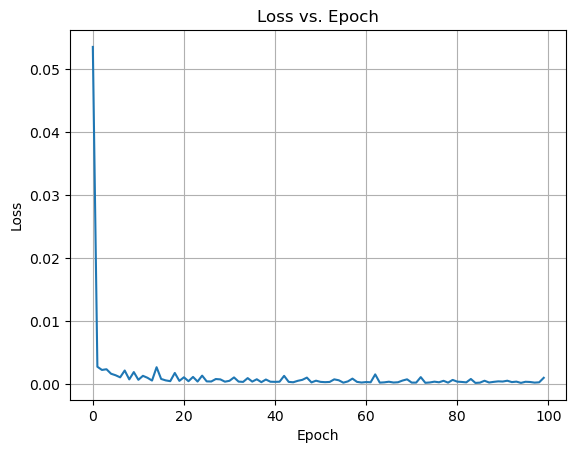

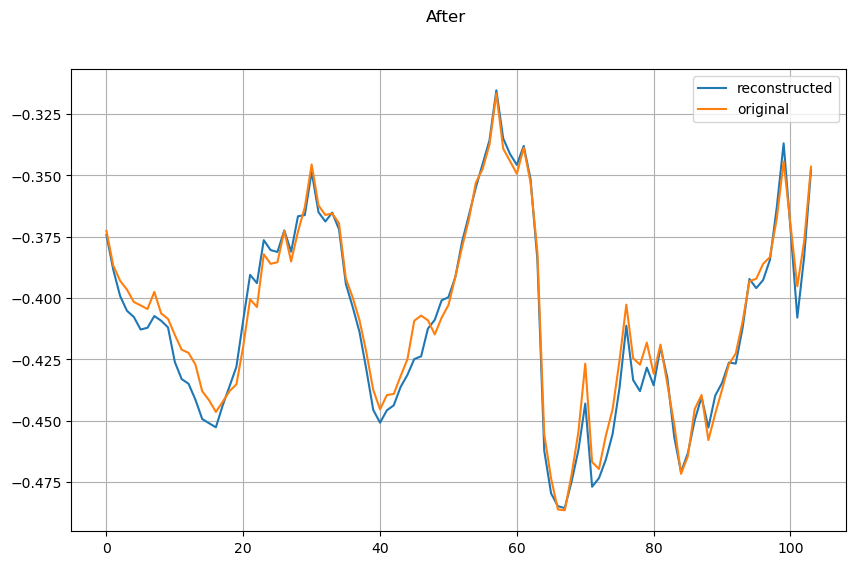

In [388]:
autoencoder_epochs = 100
model_history = autoencoder.fit(X_train_scaled, X_train_scaled, epochs=autoencoder_epochs, batch_size=50, verbose=1,)

plt.plot(model_history.history["loss"])
plt.title("Loss vs. Epoch")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.grid(True)

plot_orig_vs_recon('After')

In [389]:
model_history.history['loss'][-1]

0.0009606603998690844

In [390]:
autoencoder.summary()

Model: "model_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61_input (InputLayer  [(None, 104)]             0         
 )                                                               
                                                                 
 dense_61 (Dense)            (None, 60)                6300      
                                                                 
 dense_62 (Dense)            (None, 35)                2135      
                                                                 
 dense_63 (Dense)            (None, 20)                720       
                                                                 
 sequential_19 (Sequential)  (None, 104)               9239      
                                                                 
Total params: 18394 (71.85 KB)
Trainable params: 18394 (71.85 KB)
Non-trainable params: 0 (0.00 Byte)
______________________

In [391]:
encoder.summary()

Model: "sequential_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_61 (Dense)            (None, 60)                6300      
                                                                 
 dense_62 (Dense)            (None, 35)                2135      
                                                                 
 dense_63 (Dense)            (None, 20)                720       
                                                                 
Total params: 9155 (35.76 KB)
Trainable params: 9155 (35.76 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [396]:
model_name = '100epoch_20dimension'


encoder_path_weights = os.path.join(__reference_data_path__,
                         f'trained_ML_models/trained_weights_encoder_{model_name}.h5',
                         )

encoder.save_weights(encoder_path_weights)

decoder_path_weights = os.path.join(__reference_data_path__,
                         f'trained_ML_models/trained_weights_decoder_{model_name}.h5',
                         )

decoder.save_weights(decoder_path_weights)

In [398]:
train_encoded_space = encoder.predict(X_train_scaled)
test_encoded_space = encoder.predict(X_test_scaled)

194/194 [==============================] - 0s 1ms/step


Trained 1
Trained 6
Trained 11
Trained 16
Trained 21
Trained 26
Trained 31
Trained 36
Trained 41
Trained 46


Text(0.5, 0, 'n_components')

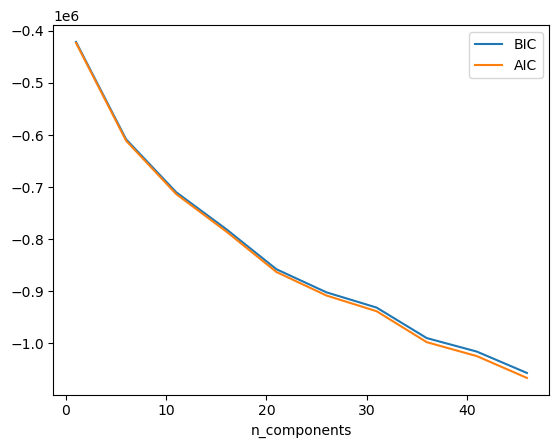

In [347]:
n_components = np.arange(1, 50, 5)
models = []

for n in n_components:
    models.append(GaussianMixture(n, covariance_type='tied').fit(train_encoded_space))
    print(f"Trained {n}")

plt.plot(n_components, [m.bic(train_encoded_space) for m in models], label='BIC')
plt.plot(n_components, [m.aic(train_encoded_space) for m in models], label='AIC')
plt.legend(loc='best')
plt.xlabel('n_components')

In [348]:
gmm = GaussianMixture(50, covariance_type='tied')
gmm.fit(train_encoded_space)

GaussianMixture(covariance_type='tied', n_components=50)

In [352]:
hard_clusters = gmm.predict(train_encoded_space)
hard_clusters[:10]

array([ 7, 28,  6,  1, 45, 28, 40,  1,  1,  1], dtype=int64)

In [360]:
cluster_count = 50
y_train_averages = []

for i in range(cluster_count):

    # Get all indices where the point is part of ith cluster
    cluster_points = np.where(hard_clusters == i)[0]

    # no points in this given cluster
    if len(cluster_points) == 0:
        y_train_averages.append(np.array([0, 0, 0, 0]))
        continue

    # average the Y values with our subset of points, and add to the list
    cluster_y_avg = np.mean(y_train.values[cluster_points], axis=0)

    y_train_averages.append(cluster_y_avg)

    print(f"Average for cluster #{i+1}: {cluster_y_avg}")

Average for cluster #1: [4.73575499e+00 6.04700855e-01 1.06267806e-01 1.88518519e+03]
Average for cluster #2: [  4.2372339    1.28162434   0.53397905 516.95872407]
Average for cluster #3: [3.47457627e+00 2.50000000e+00 1.03559322e+00 2.30847458e+03]
Average for cluster #4: [4.78787879e+00 2.50000000e+00 7.87878788e-01 2.00606061e+03]
Average for cluster #5: [ 3.59433962e+00  2.00000000e+00 -2.07547170e-01  2.23584906e+03]
Average for cluster #6: [ 3.83991228e+00  1.14254386e+00 -5.03508772e-01  2.36666667e+03]
Average for cluster #7: [4.42924528e+00 1.97924528e+00 2.03773585e-01 1.51849057e+03]
Average for cluster #8: [4.48913043e+00 7.76854220e-01 1.65294118e+00 2.21304348e+03]
Average for cluster #9: [4.2625e+00 2.5000e+00 1.5800e+00 2.1250e+03]
Average for cluster #10: [ 3.64818548e+00  8.97177419e-01 -2.09274194e-01  2.27419355e+03]
Average for cluster #11: [ 4.61574074e+00  2.50000000e+00 -1.68518519e-01  2.18518519e+03]
Average for cluster #12: [3.72422680e+00 8.13788660e-01 2.42

In [363]:
test_proba = gmm.predict_proba(test_encoded_space)
test_proba.shape

(6178, 50)

In [384]:
gmm.score(test_encoded_space)

21.269404476407946

In [364]:
y_test.head()

gravity  c_o_ratio  metallicity  temperature
20290     5.25       2.00          1.7          400
13045     4.25       0.50         -0.7          350
24217     5.00       1.00         -0.7          300
29671     3.50       0.25          0.7          250
27234     4.25       0.50          0.5          450

In [377]:
percent_error = []
estimated_features = []

for i, proba in enumerate(test_proba):
    predicted = np.average(y_train_averages, axis=0, weights=proba)
    actual = y_test.iloc[i].values

    error = np.abs((predicted - actual) / actual)
    error[error > 100] = 0

    percent_error.append(error)
    estimated_features.append(predicted)

C:\Users\abhin\AppData\Local\Temp\ipykernel_21076\445069802.py:8: RuntimeWarning: divide by zero encountered in divide
  error = np.abs((predicted - actual) / actual)


In [382]:
estimated_features = pd.DataFrame(estimated_features, columns=['gravity','c_o_ratio','metallicity','temperature'])
estimated_features.head()

gravity  c_o_ratio  metallicity  temperature
0  4.237234   1.281624     0.533979   516.958776
1  4.237234   1.281624     0.533979   516.958778
2  4.237234   1.281624     0.533979   516.958776
3  4.237234   1.281624     0.533979   516.958776
4  4.237234   1.281624     0.533979   516.958794

In [378]:
percent_error

[array([0.19290783, 0.35918783, 0.6858947 , 0.29239694]),
 array([0.00300379, 1.56324868, 1.76282715, 0.47702508]),
 array([0.15255322, 0.28162434, 1.76282715, 0.72319592]),
 array([0.21063826, 4.12649736, 0.23717285, 1.0678351 ]),
 array([0.00300379, 1.56324868, 0.06795798, 0.14879732]),
 array([0.19290781, 0.28162433, 0.68589496, 0.39181263]),
 array([0.4195687 , 1.55834711, 0.20634088, 0.33290299]),
 array([0.00300379, 0.28162434, 0.06795801, 0.87985009]),
 array([0.1215967 , 0.07450333, 0.95099339, 0.06221681]),
 array([0.10795076, 0.14558377, 0.7330105 , 0.29239694]),
 array([0.19290783, 0.28162434, 0.06795801, 0.37855674]),
 array([0.30376431, 1.56324865, 2.06795656, 0.0153151 ]),
 array([0.21634615, 0.        , 0.21634615, 0.02838828]),
 array([0.05605065, 0.14638564, 0.06666325, 0.3051246 ]),
 array([0.14898785, 0.        , 0.28421053, 0.01281465]),
 array([0.4124113 , 0.48735026, 0.46602099, 0.21637359]),
 array([0.14784866, 5.1900002 , 0.        , 0.04981986]),
 array([0.0583

In [380]:
np.average(percent_error, axis=0)

array([0.15640951, 0.97717688, 0.8594051 , 0.29819383])

In [395]:
from TelescopeML.UnsupervisedLearning import *